# Analyze models for small classifier

In [28]:
import json
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [29]:
path = "results/history_RoBERT-base_finetune_256_config_0.0001_3e-06_20.json"

In [30]:
with open(path, "r") as f:
    data = json.load(f)

train_labels = data["train_labels"]
validation_labels = data["val_labels"]

val_rmse = data["val_rmse"]
train_rmse = data["train_rmse"]

val_mae = data["val_mae"]
train_mae = data["train_mae"]

val_loss = data["val_loss"]
train_loss = data["train_loss"]

best_epoch = np.argmin(val_rmse)
train_predictions = data["train_predictions"][best_epoch]
validation_predictions = data["validation_predictions"][best_epoch]

print(f"Best epoch: {best_epoch}")

Best epoch: 4


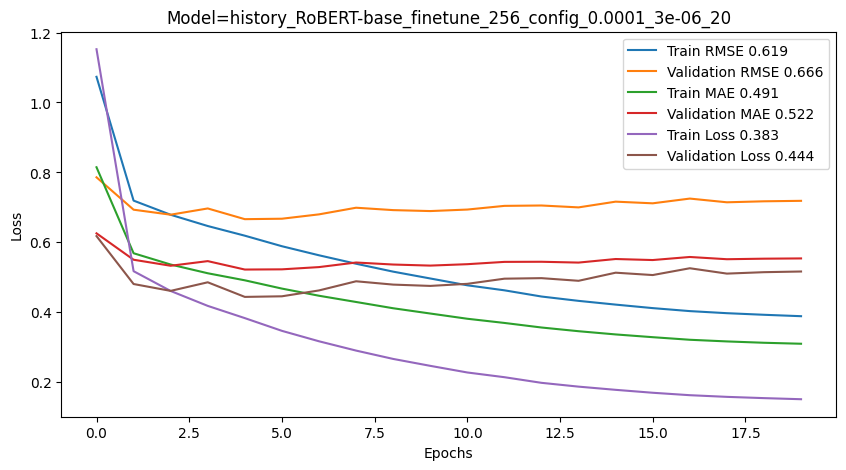

In [31]:
plt.figure(figsize=(10, 5))
plt.title(f'Model={path.split("/")[-1][:-5]}')
plt.plot(train_rmse, label=f"Train RMSE {train_rmse[best_epoch]:.3f}")
plt.plot(val_rmse, label=f"Validation RMSE {val_rmse[best_epoch]:.3f}")
plt.plot(train_mae, label=f"Train MAE {train_mae[best_epoch]:.3f}")
plt.plot(val_mae, label=f"Validation MAE {val_mae[best_epoch]:.3f}")
plt.plot(train_loss, label=f"Train Loss {train_loss[best_epoch]:.3f}")
plt.plot(val_loss, label=f"Validation Loss {val_loss[best_epoch]:.3f}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

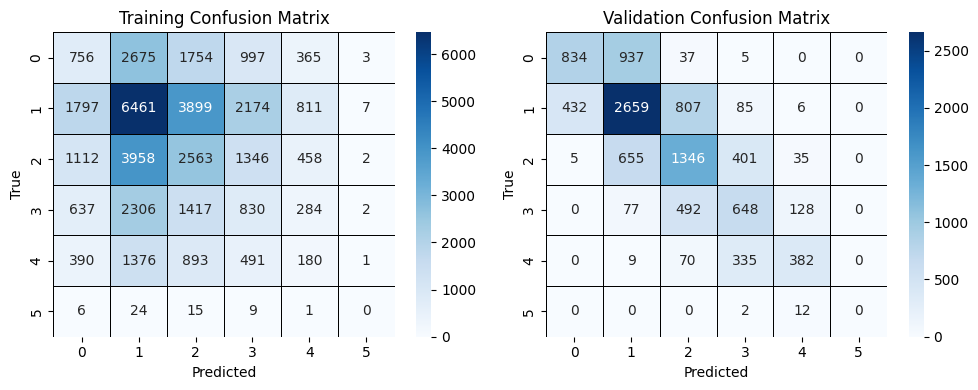

In [32]:
def correct_predictions(preds):
    return np.clip(preds, 0, 5)


train_labels_rounded = np.round(train_labels).astype(int)
train_preds_rounded = np.round(train_predictions).astype(int)
val_labels_rounded = np.round(validation_labels).astype(int)
val_preds_rounded = np.round(validation_predictions).astype(int)

train_preds_rounded = correct_predictions(train_preds_rounded)
val_preds_rounded = correct_predictions(val_preds_rounded)

train_cm = confusion_matrix(
    train_labels_rounded, train_preds_rounded, labels=[0, 1, 2, 3, 4, 5]
)
val_cm = confusion_matrix(
    val_labels_rounded, val_preds_rounded, labels=[0, 1, 2, 3, 4, 5]
)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(
    train_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    ax=axes[0],
    linewidths=0.5,
    linecolor="black",
)
axes[0].set_title("Training Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(
    val_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    ax=axes[1],
    linewidths=0.5,
    linecolor="black",
)
axes[1].set_title("Validation Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()

In [33]:
pearson_corr, _ = pearsonr(validation_predictions, validation_labels)
spearman_corr, _ = spearmanr(validation_predictions, validation_labels)

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: 0.8180498189586656
Spearman correlation: 0.8064947013209838


In [34]:
print("Training Set Classification Report:")
print(classification_report(train_labels_rounded, train_preds_rounded, digits=2))

print("\nValidation Set Classification Report:")
print(classification_report(val_labels_rounded, val_preds_rounded, digits=2))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.12      0.13      6550
           1       0.38      0.43      0.40     15149
           2       0.24      0.27      0.26      9439
           3       0.14      0.15      0.15      5476
           4       0.09      0.05      0.07      3331
           5       0.00      0.00      0.00        55

    accuracy                           0.27     40000
   macro avg       0.17      0.17      0.17     40000
weighted avg       0.26      0.27      0.26     40000


Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.46      0.54      1813
           1       0.61      0.67      0.64      3989
           2       0.49      0.55      0.52      2442
           3       0.44      0.48      0.46      1345
           4       0.68      0.48      0.56       796
           5       0.00      0.00      0.00        14

  

/home/vlad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vlad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vlad/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
